In [ ]:
# 1. Como você recupera dados do site
import numpy as np
import pandas as pd


In [ ]:
  trips_df = pd.read_csv('/content/project_sql_result_01.csv')
  neighborhoods_df = pd.read_csv('/content/moved_project_sql_result_04.csv')
  weather_trips_df = pd.read_csv('/content/moved_project_sql_result_07.csv')

In [ ]:
print("Dados de Corridas de Táxi:")
print(trips_df.head())


Dados de Corridas de Táxi:
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299


In [ ]:
print("\nDados de Bairros de Chicago:")
print(neighborhoods_df.head())


Dados de Bairros de Chicago:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


***Estudar os Dados que cada DataFrame Contêm***

In [ ]:
print("\nInformações sobre trips_df:")
print(trips_df.info())


Informações sobre trips_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


In [ ]:
print("\nInformações sobre neighborhoods_df:")
print(neighborhoods_df.info())


Informações sobre neighborhoods_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


*** Verificando os tipos de dados ***

In [ ]:
print("\nTipos de dados em trips_df:")
print(trips_df.dtypes)


Tipos de dados em trips_df:
company_name    object
trips_amount     int64
dtype: object


In [ ]:
print("\nTipos de dados em neighborhoods_df:")
print(neighborhoods_df.dtypes)


Tipos de dados em neighborhoods_df:
dropoff_location_name     object
average_trips            float64
dtype: object


*** Identifique os bairros com a maior média de corridas. ***

In [ ]:
top_neighborhoods = neighborhoods_df.nlargest(10, 'average_trips')
print("\nTop 10 Bairros por Número Médio de Corridas:")
print(top_neighborhoods)


Top 10 Bairros por Número Médio de Corridas:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


*** Fazer Gráficos ***

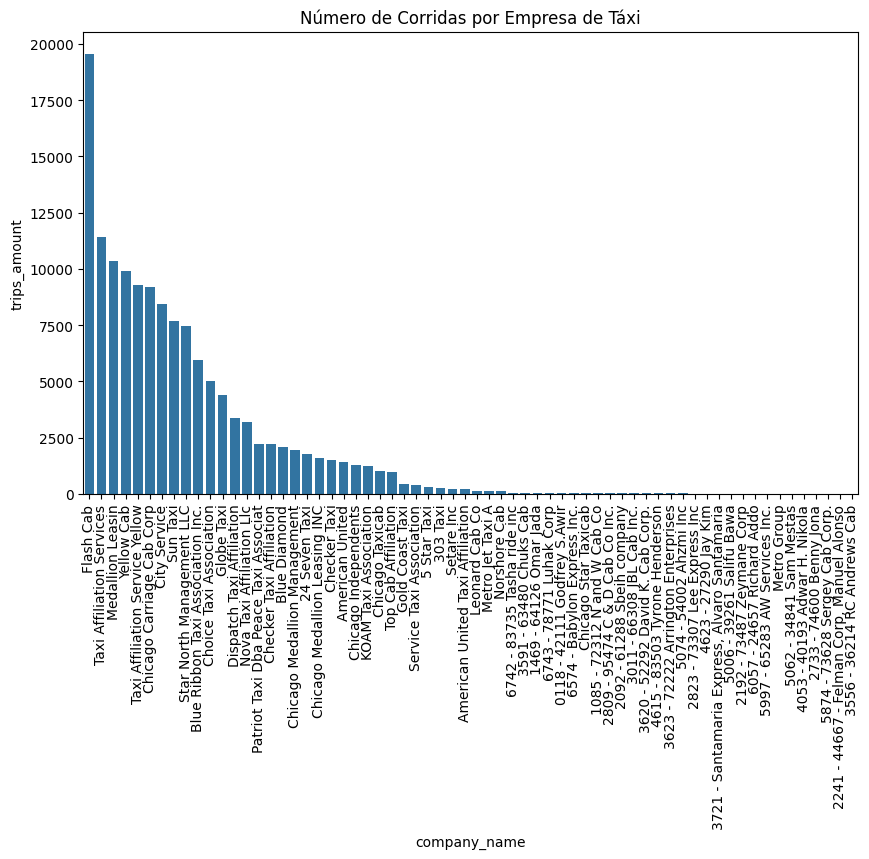

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 10 primeiras corridas
primeiras_corridas = trips_df.head(10)

# Gráfico de barras para o número de corridas por empresa de táxi
plt.figure(figsize=(10, 6))
sns.barplot(x='company_name', y='trips_amount', data=trips_df)
plt.title('Número de Corridas por Empresa de Táxi')
plt.xticks(rotation=90)
plt.show()


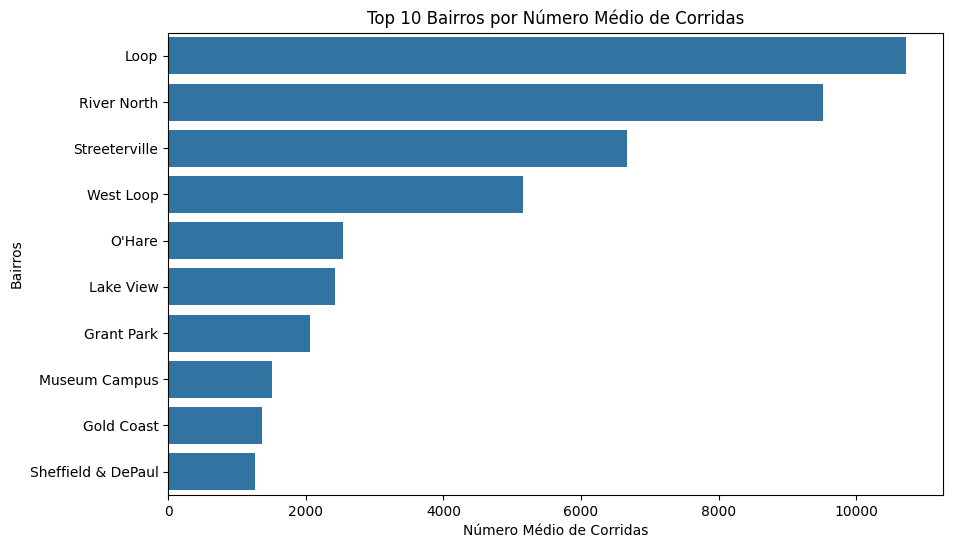

In [ ]:
# Gráfico de barras para os 10 principais bairros
plt.figure(figsize=(10, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=top_neighborhoods)
plt.title('Top 10 Bairros por Número Médio de Corridas')
plt.xlabel('Número Médio de Corridas')
plt.ylabel('Bairros')
plt.show()

*** Teste de Hipóteses ***

Formulação das Hipóteses
Hipótese Nula (H0): A duração média das corridas do Loop para o Aeroporto Internacional O'Hare em sábados chuvosos não é diferente da duração média em  boas condições climáticas.

Hipótese Alternativa (𝐻1): A duração média das corridas do Loop para o Aeroporto Internacional O'Hare em sábados chuvosos é diferente da duração média em sábados com boas condições climáticas.

In [ ]:
from scipy import stats
from datetime import datetime


In [ ]:
# Filtrar dados para condições meteorológicas
rainy_trips = weather_trips_df[weather_trips_df['weather_conditions'] == 'Bad']['duration_seconds']
good_trips = weather_trips_df[weather_trips_df['weather_conditions'] == 'Good']['duration_seconds']

# Realizar o teste t
t_statistic, p_value = stats.ttest_ind(rainy_trips, good_trips)

# Definir nível de significância
alpha = 0.05

# Interpretar resultados
if p_value < alpha:
    print("Rejeita-se a hipótese nula.")
else:
    print("Não se rejeita a hipótese nula.")

print(f"T-statistic: {t_statistic}, p-value: {p_value}")


Rejeita-se a hipótese nula.
T-statistic: 6.946177714041499, p-value: 6.517970327099473e-12


 Isso sugere que a duração média das corridas em sábados chuvosos é significativamente diferente da duração em sábados com boas

In [ ]:
weather_trips_df['start_ts'] = pd.to_datetime(weather_trips_df['start_ts'])

In [ ]:
#
weather_trips_df['day_of_week'] = weather_trips_df['start_ts'].dt.day_name()

In [ ]:
weather_trips_df

,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,Saturday
1064,2017-11-11 10:00:00,Good,1318.0,Saturday
1065,2017-11-11 13:00:00,Good,2100.0,Saturday
1066,2017-11-11 08:00:00,Good,1380.0,Saturday


*** Formulando as Hipóteses***

H0: A duração média das corridas do Loop para O'Hare não muda em dias chuvosos.
H1: A duração média das corridas do Loop para O'Hare muda em dias chuvosos.


In [ ]:
if p_value < alpha:
    print("Conclusão: Há uma diferença significativa na duração das corridas do Loop para O'Hare em dias chuvosos.")
else:
    print("Conclusão: Não há evidências suficientes para afirmar que a duração das corridas do Loop para O'Hare muda em dias chuvosos.")

Conclusão: Há uma diferença significativa na duração das corridas do Loop para O'Hare em dias chuvosos.
